# **Milestone 1 :**

## **I. Perkenalan :**

Nama : Muhammad Farhan Darmawan

Batch : RMT-019

**URL :**

Dataset : [Click Here for Dataset](https://www.kaggle.com/datasets/gregorut/videogamesales)

Dashboard : [Click Here for Dashboard](https://lookerstudio.google.com/reporting/7ad67982-fc33-4dd0-bd32-10217da10e5e)

## **II. Identifikasi Masalah :**

### **Topik Permasalahan :**

Penjualan Video Games 

### **Problem Statement :**

Mengetahui perkembangan penjualan video game dengan tahun rilis dari 2010 - 2020 di seluruh dunia 

### **Latar Belakang :**

Sebagai seorang data scientist di salah satu perusahaan distribusi video games Anda diminta oleh tim management untuk melihat penjualan video games yang terdistribusi di North Amerika, Eropa, Jepang, dan Wilayah lainnya dengan tahun rilis video game dari tahun 2010 - 2020

### **Point Penjabaran :**


1. Dari Wilayah North Amerika, Eropa, dan Jepang penjualan wilayah mana yang paling tinggi ?
2.   Bagaimana hasil penjualan video game berdasarkan platform yang digunakan ?
3.   Apakah Genre yang paling favorit ?
4.   Game apa yang penjualannya paling tinggi di seluruh dunia ?
5.   Kapan penjualan video game tertinggi berdasarkan platform yang digunakan ?



## **III.Data Loading :**

**Dataset ini berisi tentang penjualan video game dengan lebih dari 100.000 copies terdiri dari :**

- `Rank` : Peringkat penjualan
- `Name` : Nama Video Game
- `Platform` : Game Console
- `Year` : Tahun Rilis Video Game
- `Genre` : Genre Video Game
- `Publisher` : Game Developer
- `NA_Sales` : Penjualan Video Game di North Amerika
- `EU_Sales` : Penjualan Video Game di Eropa
- `JP_Sales` : Penjualan Video Game di Jepang
- `Other_Sales` : Penjualan Video Game di Wilayah Lain
- `Global_Sales` : Total Penjualan Video Game di Seluruh Dunia  

### **Import Library & Data Loading**

In [1]:
# import library yang akan digunakan
import pandas as pd
import numpy as np
import sympy as sy
from scipy import stats
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Install Kaggle
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# Buat file baru dan connect ke kaggle.json
!mkdir ~/.kaggle
!cp '/content/drive/MyDrive/Kaggle/kaggle.json' ~/.kaggle

In [5]:
# Check kaggle.json
!ls ~/.kaggle

kaggle.json


In [6]:
# Download dataset dari kaggle
!kaggle datasets download -d gregorut/videogamesales

  0% 0.00/381k [00:00<?, ?B/s]
100% 381k/381k [00:00<00:00, 94.6MB/s]


In [7]:
# Unzip dataset
!unzip -q /content/videogamesales.zip -d dataset

In [8]:
# Meloading data csv yang sudah di unzip di google drive
data_vidgame = pd.read_csv('/content/dataset/vgsales.csv')
data_vidgame

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


### **Eksplorasi Data :**

In [9]:
# Menampilkan 10 data teratas
data_vidgame.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [10]:
# Menampilkan 10 data terbawah
data_vidgame.tail(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16588,16591,Mega Brain Boost,DS,2008.0,Puzzle,Majesco Entertainment,0.01,0.00,0.00,0.0,0.01
16589,16592,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016.0,Action,dramatic create,0.00,0.00,0.01,0.0,0.01
16590,16593,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007.0,Role-Playing,Falcom Corporation,0.00,0.00,0.01,0.0,0.01
16591,16594,Myst IV: Revelation,PC,2004.0,Adventure,Ubisoft,0.01,0.00,0.00,0.0,0.01
16592,16595,Plushees,DS,2008.0,Simulation,Destineer,0.01,0.00,0.00,0.0,0.01
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01


In [11]:
# Menampilkan matrix dataframe
data_vidgame.shape

(16598, 11)

In [12]:
# Menampilkan informasi dataframe
data_vidgame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [13]:
# Menampilkan data yang bernilai null
data_vidgame.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [14]:
# Menghitung perhitungan statistika pada kolom dengan jenis tipe data int atau float
data_vidgame.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [15]:
# Menampilkan data tahun tertua
data_vidgame['Year'].min()

1980.0

In [16]:
# Menampilkan data tahun termuda
data_vidgame['Year'].max()

2020.0

## **IV.Data Cleaning**

In [17]:
# Menampilkan data yang bernilai null
data_vidgame.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Dari data_vidgame diatas diketahui bahwa pada kolom Year memiliki 275 null values dan Publisher memiliki 58 null values.

Saya akan menghapus baris bernilai null sehingga nanti akan merubah jumlah data yang tersedia, keputusan ini saya lakukan karena nilai null kurang dari 5% terhadap data yang telah tersedia

In [18]:
# Menghapus nilai null pada kolom Year dan Publisher menggunakan .dropna()
data_vidgame.dropna(subset=['Year', 'Publisher'], inplace=True)

In [19]:
# Menampilkan data bernilai null yang sudah dilakukan dropna()
data_vidgame.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [20]:
# Menghapus kolom rank karena kolom rank tidak diperlukan
data_vidgame.drop(['Rank'], inplace = True, axis = 1)

In [21]:
# Menampilkan shape baru dari data_vidgame
data_vidgame.shape

(16291, 10)

## **V. Analisis dan Perhitungan**

### **Statistika Descriptive**

In [22]:
# Membuat dataframe baru dengan game rilis tahun 2010 - 2020
vidgame_clean = data_vidgame[(data_vidgame['Year'] >= 2010)]
vidgame_clean

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
15,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
16,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
23,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
26,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
...,...,...,...,...,...,...,...,...,...,...
16578,Outdoors Unleashed: Africa 3D,3DS,2011.0,Sports,Mastiff,0.01,0.00,0.00,0.00,0.01
16581,Fit & Fun,Wii,2011.0,Sports,Unknown,0.00,0.01,0.00,0.00,0.01
16585,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01
16589,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016.0,Action,dramatic create,0.00,0.00,0.01,0.00,0.01


**Skewness**

In [23]:
# Menampilkan 10 data teratas
vidgame_clean.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
15,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
16,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
23,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
26,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
31,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
32,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,Nintendo,5.17,4.05,4.34,0.79,14.35
33,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
35,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.30,0.07,1.12,13.73


In [24]:
vg_na = vidgame_clean['NA_Sales']
vg_eu = vidgame_clean['EU_Sales']
vg_jp = vidgame_clean['JP_Sales']
vg_oth = vidgame_clean['Other_Sales']
vg_glb = vidgame_clean['Global_Sales']

In [25]:
# Nilai Mean dan Median dari data sales

# North Amerika
mean_na = vg_na.mean()
median_na = vg_na.median()

# Eropa
mean_eu = vg_eu.mean()
median_eu = vg_eu.median()

# Jepang
mean_jp = vg_jp.mean()
median_jp = vg_jp.median()

# Other
mean_oth = vg_oth.mean()
median_oth = vg_oth.median()

# Global
mean_glb = vg_glb.mean()
median_glb = vg_glb.median()

In [26]:
print('Nilai Mean Sales di North Amerika :', mean_na, 'USD')
print('Nilai Median Sales di North Amerika :', median_na, 'USD')
print('\n')
print('Nilai Mean Sales di Eropa :' , mean_eu, 'USD')
print('Nilai Median Sales di Eropa :' , median_eu, 'USD')
print('\n')
print('Nilai Mean Sales di Jepang :', mean_jp, 'USD')
print('Nilai Median Sales di Jepang :', median_jp, 'USD')
print('\n')
print('Nilai Mean Sales di Other :', mean_oth, 'USD')
print('Nilai Median Sales di Other :', median_oth, 'USD')
print('\n')
print('Nilai Mean Sales di Global :', mean_glb, 'USD')
print('Nilai Median Sales di Global :', median_glb, 'USD')

Nilai Mean Sales di North Amerika : 0.21672380210362288 USD
Nilai Median Sales di North Amerika : 0.05 USD


Nilai Mean Sales di Eropa : 0.16333073626801714 USD
Nilai Median Sales di Eropa : 0.03 USD


Nilai Mean Sales di Jepang : 0.058192442539929876 USD
Nilai Median Sales di Jepang : 0.0 USD


Nilai Mean Sales di Other : 0.052537982080249325 USD
Nilai Median Sales di Other : 0.01 USD


Nilai Mean Sales di Global : 0.49092325671990644 USD
Nilai Median Sales di Global : 0.14 USD


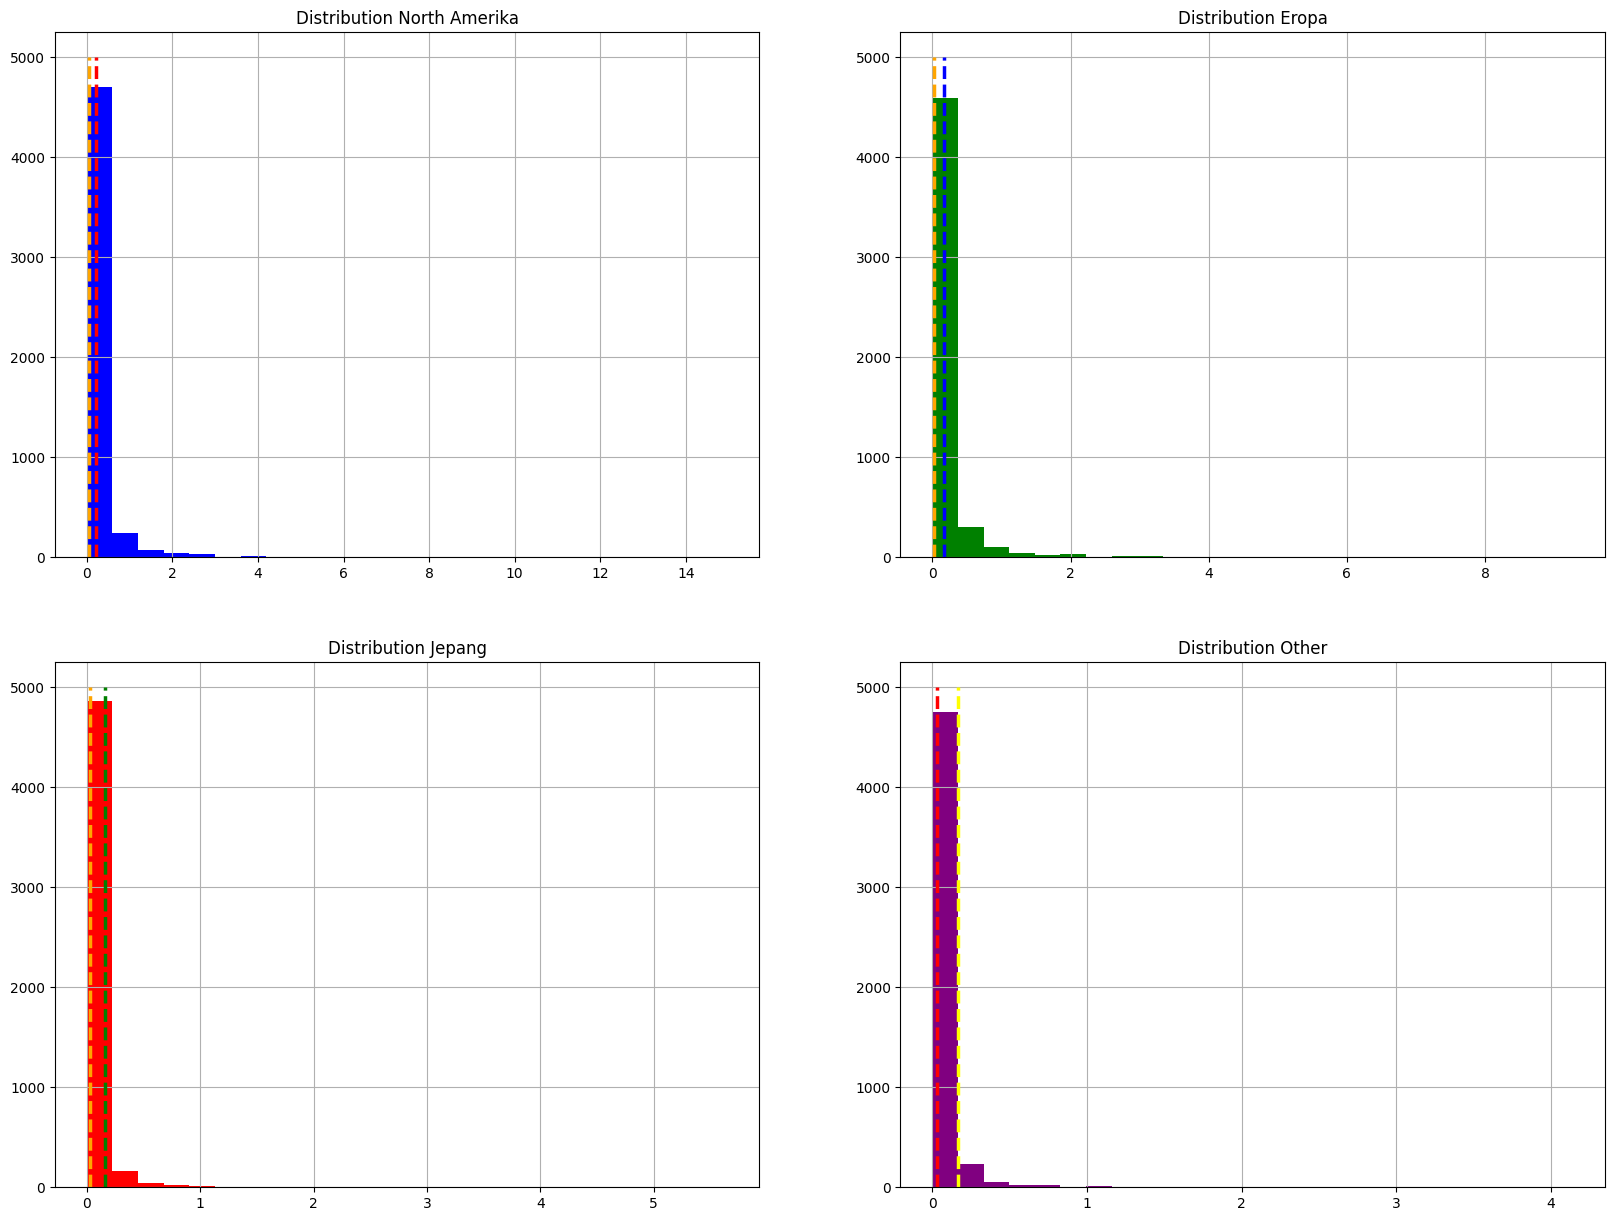

In [27]:
# Menampilkan Histogram Skewness
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,15))

# Histogram North Amerika
vg_na.hist(ax = axes[0,0], color = 'blue', bins = 25)
axes[0,0].set_title('Distribution North Amerika')
axes[0,0].vlines(mean_na, ymin = 0, ymax = 5000, color = 'red', linestyle = 'dashed', linewidth = 2.5)
axes[0,0].vlines(median_na, ymin = 0, ymax = 5000, color = 'orange', linestyle = 'dashed', linewidth = 2.5)

# Histogram Eropa
vg_eu.hist(ax = axes[0,1], color = 'green', bins = 25)
axes[0,1].set_title('Distribution Eropa')
axes[0,1].vlines(mean_eu, ymin = 0, ymax = 5000, color = 'blue', linestyle = 'dashed', linewidth = 2.5)
axes[0,1].vlines(median_eu, ymin = 0, ymax = 5000, color = 'orange', linestyle = 'dashed', linewidth = 2.5)

# Histogram Jepang
vg_jp.hist(ax = axes[1,0], color = 'red', bins = 25)
axes[1,0].set_title('Distribution Jepang')
axes[1,0].vlines(mean_eu, ymin = 0, ymax = 5000, color = 'green', linestyle = 'dashed', linewidth = 2.5)
axes[1,0].vlines(median_eu, ymin = 0, ymax = 5000, color = 'orange', linestyle = 'dashed', linewidth = 2.5)

# Histogram Other
vg_oth.hist(ax = axes[1,1], color = 'purple', bins = 25)
axes[1,1].set_title('Distribution Other')
axes[1,1].vlines(mean_eu, ymin = 0, ymax = 5000, color = 'yellow', linestyle = 'dashed', linewidth = 2.5)
axes[1,1].vlines(median_eu, ymin = 0, ymax = 5000, color = 'red', linestyle = 'dashed', linewidth = 2.5)

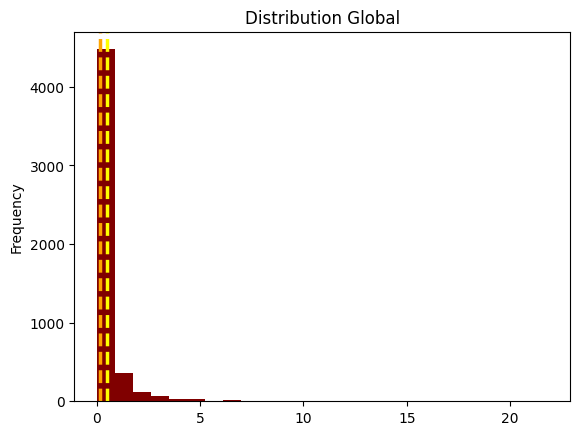

In [28]:
# Histogram Global
vg_glb.plot.hist(title = 'Distribution Global', color = 'maroon', bins = 25)
plt. axvline(mean_glb, color = 'yellow', linestyle = 'dashed', linewidth = 2.5)
plt. axvline(median_glb, color = 'orange', linestyle = 'dashed', linewidth = 2.5)

In [29]:
# Nilai Skweness
skew_na = vg_na.skew()
skew_eu = vg_eu.skew()
skew_jp = vg_jp.skew()
skew_oth = vg_oth.skew()
skew_glb = vg_glb.skew()

In [30]:
print('Nilai Skewness North Amerika :', skew_na)
print('Nilai Skewness Eropa :', skew_eu)
print('Nilai Skewness Jepang :', skew_jp)
print('Nilai Skewness Other :', skew_oth)
print('Nilai Skewness Global :',skew_glb)

Nilai Skewness North Amerika : 8.9361375661124
Nilai Skewness Eropa : 7.402790461154419
Nilai Skewness Jepang : 12.655594132959214
Nilai Skewness Other : 9.617888769712717
Nilai Skewness Global : 7.466170444113339


**Dari ke-5 data histogram dan nilai skewness diatas diketahui bahwa :**

- Data distribusi North Amerika yaitu `distribusi tidak normal` dengan kemiringan `sangat miring` (*left skewness*)

- Data distribusi Eropa yaitu `distribusi tidak normal` dengan kemiringan `sangat miring` (*left skewness*)

- Data distribusi Jepang yaitu `distribusi tidak normal` dengan kemiringan `sangat miring` (*left skewness*)

- Data distribusi Other yaitu `distribusi tidak normal` dengan kemiringan `sangat miring` (*left skewness*)

- Data distribusi Global yaitu `distribusi tidak normal` dengan kemiringan `sangat miring` (*left skewness*)


**Outliers**

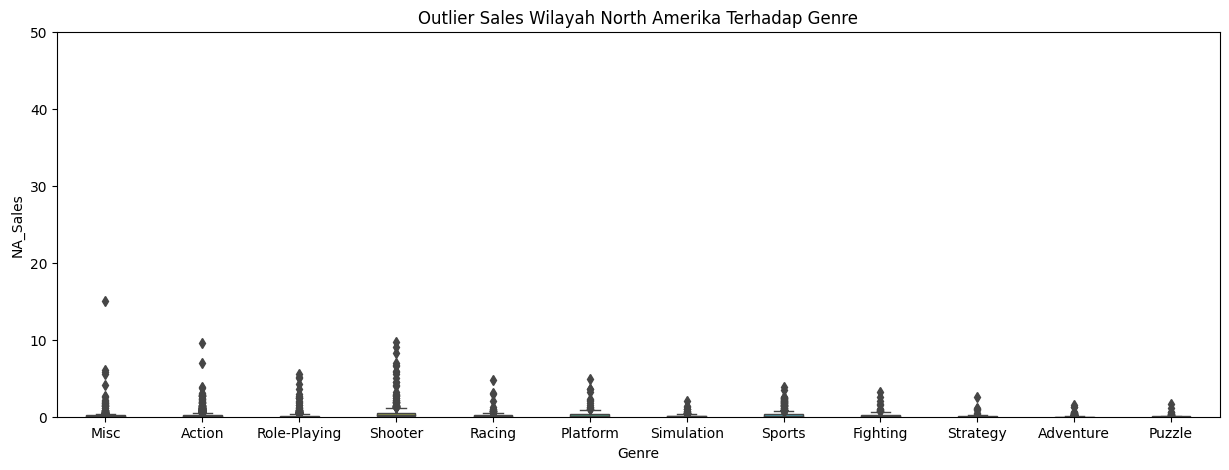

In [31]:
# Menampilkan data outlier sales di North Amerika
plt.subplots(figsize= (15,5))
plt.title('Outlier Sales Wilayah North Amerika Terhadap Genre')
sns.boxplot(x = 'Genre', y = 'NA_Sales', data = vidgame_clean, width = 0.4, linewidth = 1)
plt.ylim(0,50)
plt.show()

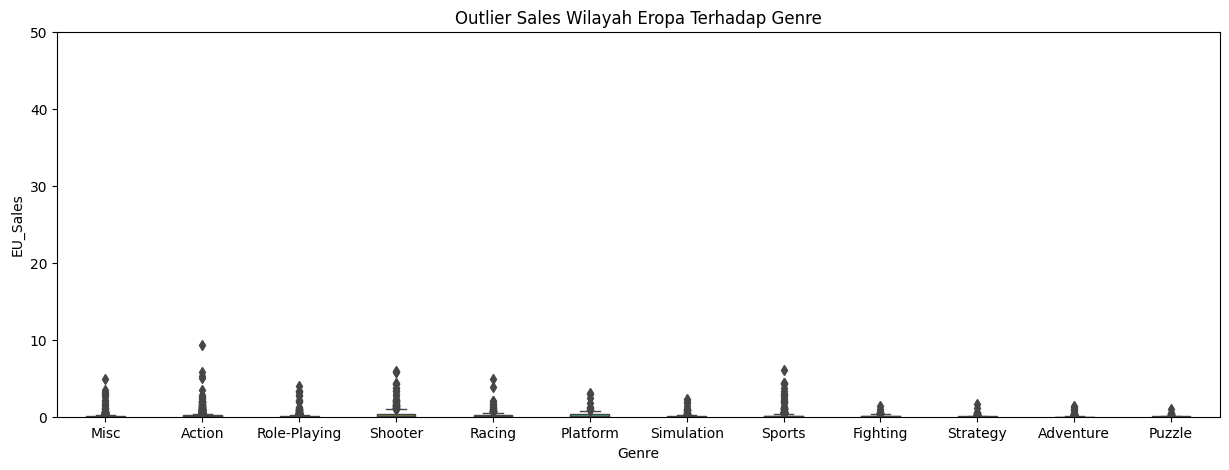

In [32]:
# Menampilkan data outlier sales di Eropa
plt.subplots(figsize= (15,5))
plt.title('Outlier Sales Wilayah Eropa Terhadap Genre')
sns.boxplot(x = 'Genre', y = 'EU_Sales', data = vidgame_clean, width = 0.4, linewidth = 1)
plt.ylim(0,50)
plt.show()

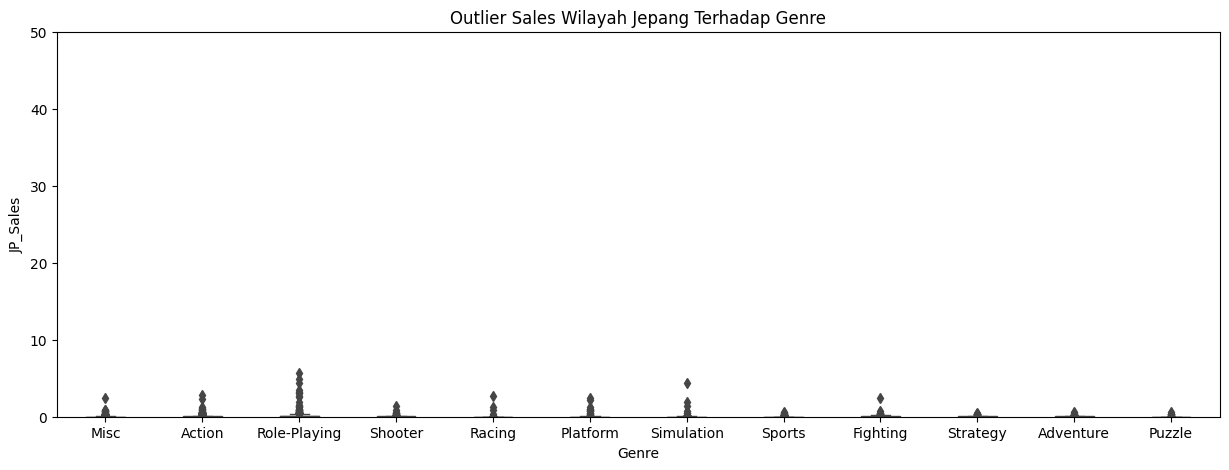

In [33]:
# Menampilkan data outlier sales di Jepang
plt.subplots(figsize= (15,5))
plt.title('Outlier Sales Wilayah Jepang Terhadap Genre')
sns.boxplot(x = 'Genre', y = 'JP_Sales', data = vidgame_clean, width = 0.4, linewidth = 1)
plt.ylim(0,50)
plt.show()

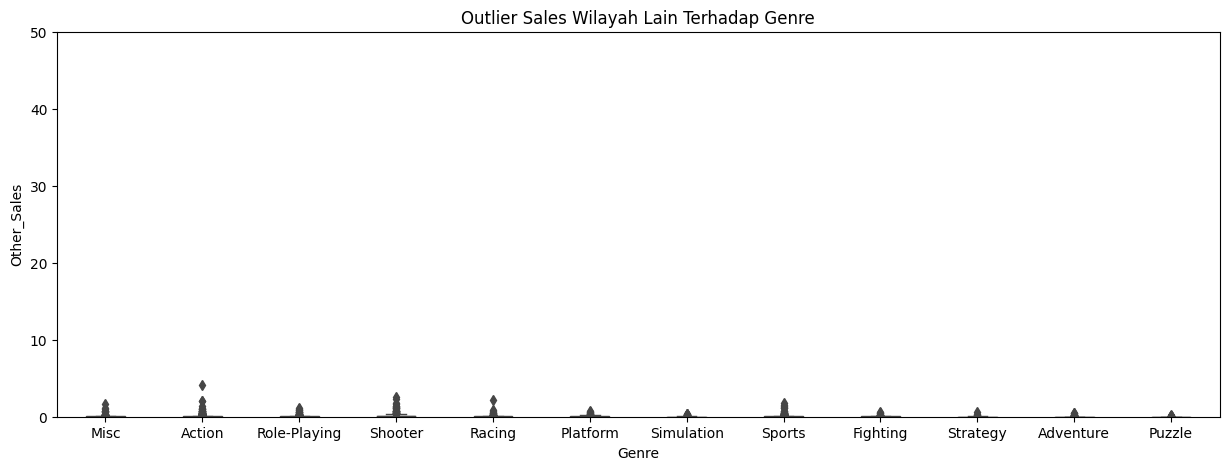

In [34]:
# # Menampilkan data outlier sales di Other
plt.subplots(figsize= (15,5))
plt.title('Outlier Sales Wilayah Lain Terhadap Genre')
sns.boxplot(x = 'Genre', y = 'Other_Sales', data = vidgame_clean, width = 0.4, linewidth = 1)
plt.ylim(0,50)
plt.show()

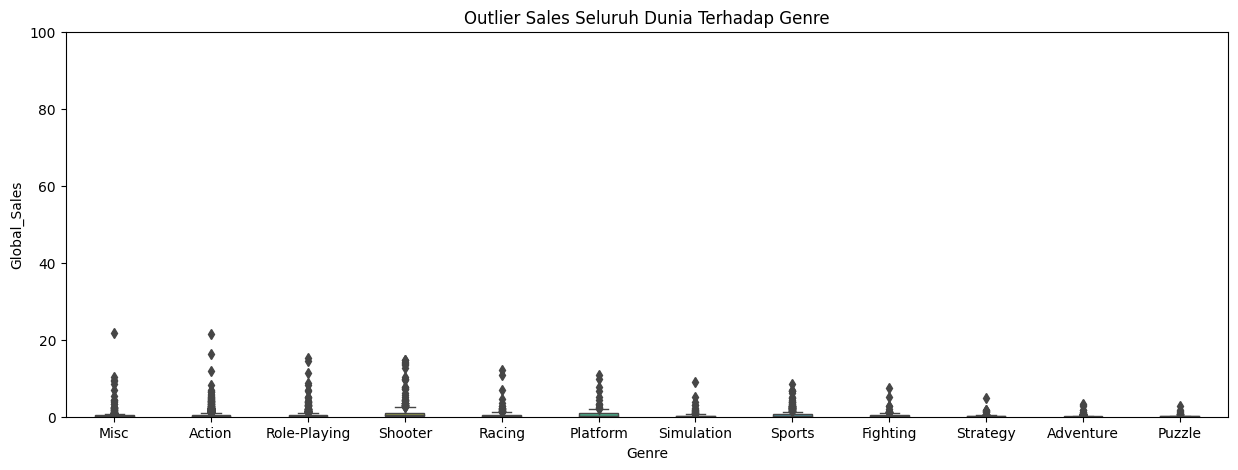

In [35]:
# Menampilkan data outlier sales di Seluruh Dunia
plt.subplots(figsize= (15,5))
plt.title('Outlier Sales Seluruh Dunia Terhadap Genre')
sns.boxplot(x = 'Genre', y = 'Global_Sales', data = vidgame_clean, width = 0.4, linewidth = 1)
plt.ylim(0,100)
plt.show()

**Dari data outlier diatas diketahui bahwa :**

- Penjualan tertinggi di North Amerika yaitu video games bergenre `Misc`

- Penjualan tertinggi di Eropa yaitu video games bergenre `Action`

- Penjualan tertinggi di Jepang yaitu video games bergenre `Role Playing`

- Penjualan tertinggi di Other yaitu video games bergenre `Action`

- Penjualan tertinggi di Seluruh Dunia yaitu video games bergenre `Misc`

*Data outlier diatas tidak dilakukan perubahan karena masih masuk akal*

**Central Tendency**

<ipython-input-36-25c3e4c7d8d3>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales_mean_genre = vidgame_clean.groupby('Genre')[('NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales')].mean()


<Axes: title={'center': 'Rata-rata Penjualan Berdasarkan Genre Tahun Rilis Game 2010 - 2020'}, xlabel='Genre'>

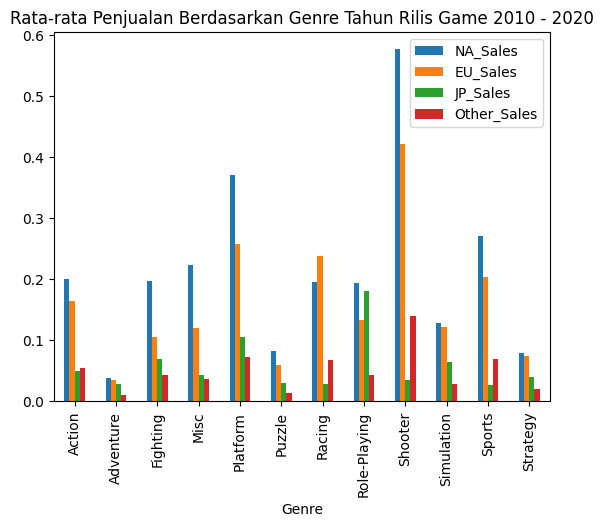

In [36]:
# rata-rata penjualan berdasarkan genre
sales_mean_genre = vidgame_clean.groupby('Genre')[('NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales')].mean()
sales_mean_genre.plot(kind = 'bar', title = 'Rata-rata Penjualan Berdasarkan Genre Tahun Rilis Game 2010 - 2020')

<ipython-input-37-69c7e60290c8>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales_mean_platform = vidgame_clean.groupby('Platform')[('NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales')].mean()


<Axes: title={'center': 'Rata-rata Penjualan Berdasarkan Platform Tahun Rilis Game 2010 - 2020'}, xlabel='Platform'>

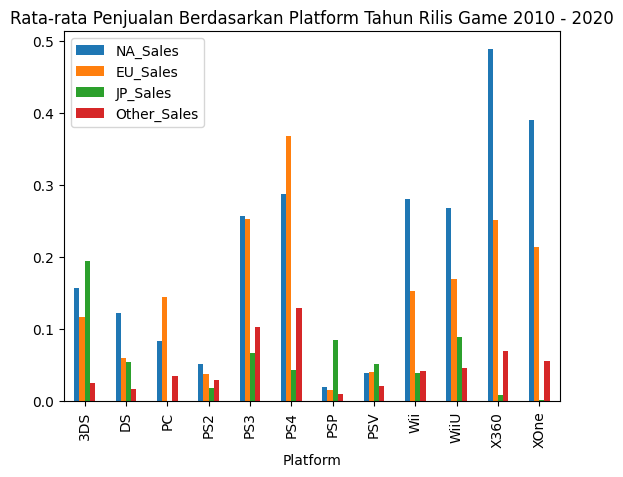

In [37]:
# rata-rata penjualan berdasarkan platform
sales_mean_platform = vidgame_clean.groupby('Platform')[('NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales')].mean()
sales_mean_platform.plot(kind = 'bar', title = 'Rata-rata Penjualan Berdasarkan Platform Tahun Rilis Game 2010 - 2020')

<ipython-input-38-f3a85fc35495>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales_median_genre = vidgame_clean.groupby('Genre')[('NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales')].median()


<Axes: title={'center': 'Median Penjualan Berdasarkan Genre Tahun Rilis Game 2010 - 2020'}, xlabel='Genre'>

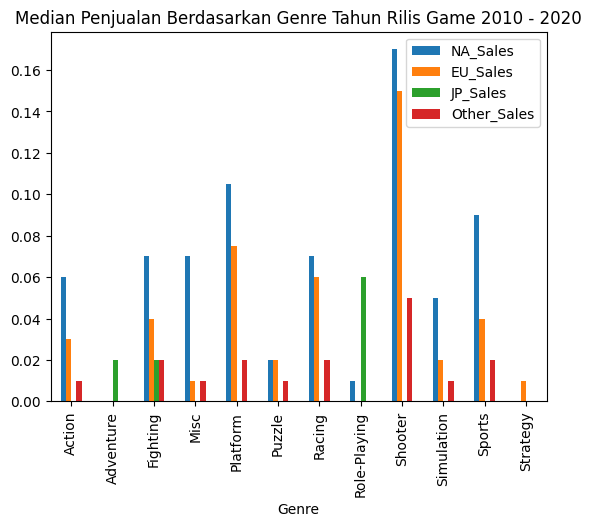

In [38]:
# median penjualan berdasarkan genre
sales_median_genre = vidgame_clean.groupby('Genre')[('NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales')].median()
sales_median_genre.plot(kind = 'bar', title = 'Median Penjualan Berdasarkan Genre Tahun Rilis Game 2010 - 2020')

<ipython-input-39-5b42f5bb0c41>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales_median_platform = vidgame_clean.groupby('Platform')[('NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales')].median()


<Axes: title={'center': 'Median Penjualan Berdasarkan Platform Tahun Rilis Game 2010 - 2020'}, xlabel='Platform'>

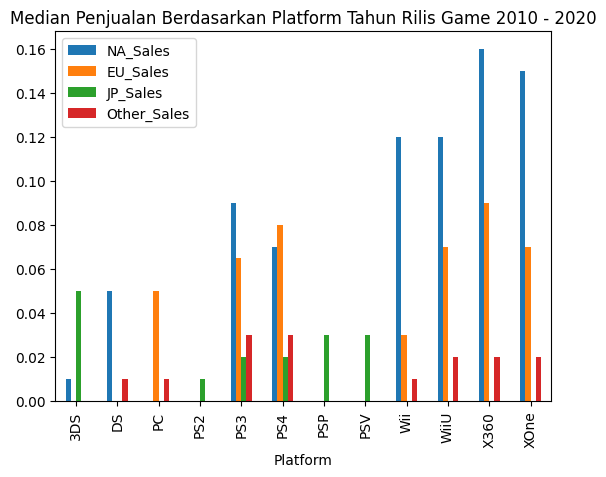

In [39]:
# median penjualan berdasarkan platform
sales_median_platform = vidgame_clean.groupby('Platform')[('NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales')].median()
sales_median_platform.plot(kind = 'bar', title = 'Median Penjualan Berdasarkan Platform Tahun Rilis Game 2010 - 2020')

In [40]:
# modus berdasarkan
modus_genre = vidgame_clean['Genre'].mode()[0]
modus_genre

'Action'

[Text(0.5, 1.0, 'Modus Berdasarkan Genre Game Tahun Rilis 2010 - 2020'),
 Text(0.5, 0, 'Genre'),
 Text(0, 0.5, 'Jumlah')]

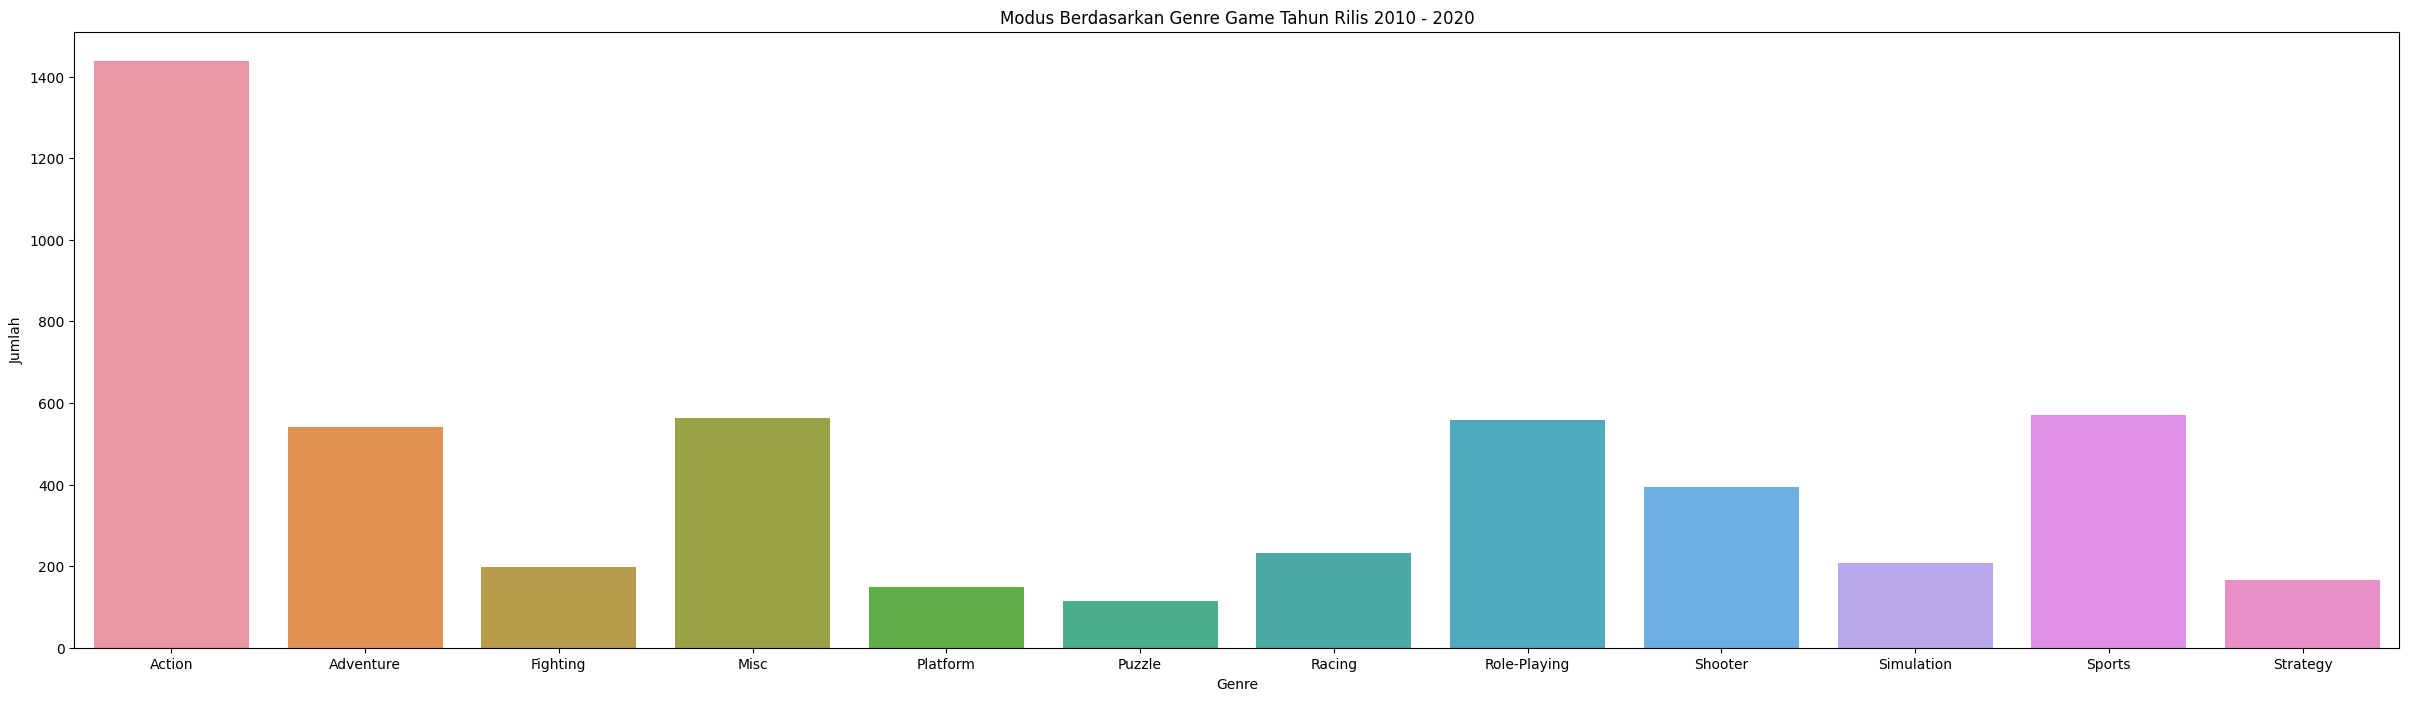

In [41]:
# Menampilkan grafik modus
count_genre = vidgame_clean.groupby('Genre')['Genre'].count().to_frame()
count_genre
plt.figure(figsize=(30,8))
ax_count_genre = sns.barplot(data = count_genre, x = count_genre.index, y = 'Genre')
ax_count_genre.set(title = 'Modus Berdasarkan Genre Game Tahun Rilis 2010 - 2020', xlabel = 'Genre', ylabel = 'Jumlah')

In [42]:
# modus berdasarkan platform
modus_platform = vidgame_clean['Platform'].mode()[0]
modus_platform

'PS3'

[Text(0.5, 1.0, 'Modus Berdasarkan Platform Game Tahun Rilis 2010 - 2020'),
 Text(0.5, 0, 'Platform'),
 Text(0, 0.5, 'Jumlah')]

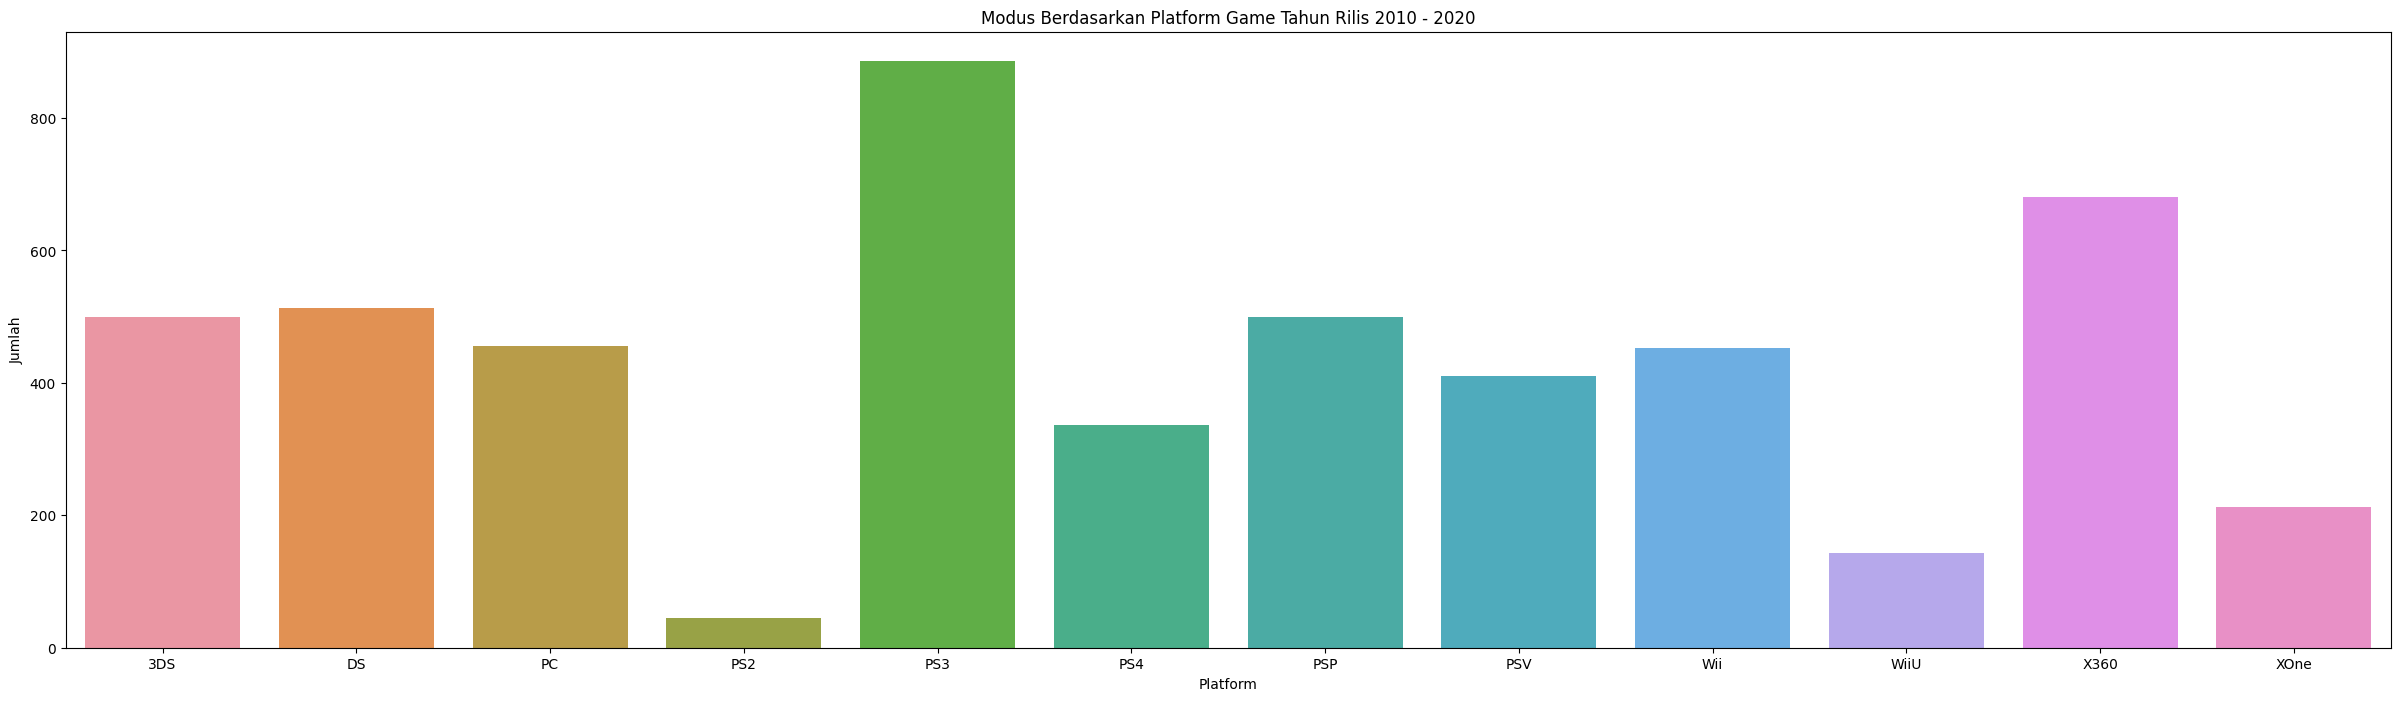

In [43]:
# Menampilkan grafik modus
count_platform = vidgame_clean.groupby('Platform')['Platform'].count().to_frame()
count_platform
plt.figure(figsize=(30,8))
ax_count_genre = sns.barplot(data = count_platform, x = count_platform.index, y = 'Platform')
ax_count_genre.set(title = 'Modus Berdasarkan Platform Game Tahun Rilis 2010 - 2020', xlabel = 'Platform', ylabel = 'Jumlah')

**Dari data diatas diketahui bahwa :**

Mean :

- Berdasarkan genre dan platform nilai rata-rata penjualan tertinggi yaitu di North Amerika 

Median :

- Berdasarkan genre dan platform nilai median tertinggi berada di North Amerika

Modus :

- Berdasarkan genre video games yang paling banyak terjual yaitu video games bergenre `action`
- Berdasarkan platform video games yang paling banyak terjual dari platform `PS3`

### **Statistika Inferential**

**Hypothesis Testing:**

**Two Samples Independent Two Tails**

In [60]:
# Mengetahui rata-rata penjualan video games genre platform dan racing
sales_platform = vidgame_clean[(vidgame_clean['Genre'] == 'Platform')].groupby('Year')['Global_Sales'].sum().to_frame()
sales_racing = vidgame_clean[(vidgame_clean['Genre'] == 'Racing')].groupby('Year')['Global_Sales'].sum().to_frame()

print('Rata-rata penjualan genre platform : ${}'.format(np.round(sales_platform.Global_Sales.mean())))
print('Rata-rata penjualan genre racing : ${}'.format(np.round(sales_racing.Global_Sales.mean())))

Rata-rata penjualan genre platform : $17.0
Rata-rata penjualan genre racing : $18.0


Diketahui rata-rata penjualan video game bergenre platform dan racing memiliki nilai rata-rata yang hampir sama

Saya akan melakukan Uji hypothesis apakah penjualan pada video game bergenre platform dan racing memang benar sama atau tidak

**Hypothesis Testing :**

**C-Value = 5%**

**H0 : μ_platform = μ_racing**

**H1 : μ_platform != μ_racing**

In [61]:
t_stat, p_val = stats.ttest_ind(sales_platform,sales_racing)
print('P-value:',p_val[0]) 
print('t-statistics:',t_stat[0])

P-value: 0.9487803317527637
t-statistics: -0.06559509543432725


<ipython-input-62-721188189ad1>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(platform_pop, label='Rata-rata penjualan video game bergenre platform *Pop',color='blue')
<ipython-input-62-721188189ad1>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(racing_pop, label='Rata-rata penjualan video

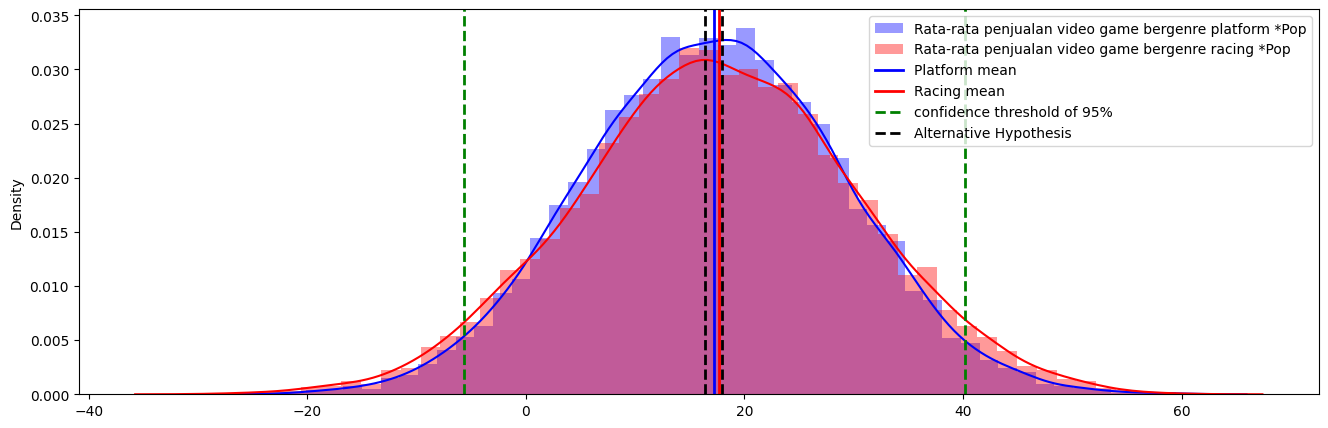

In [62]:
platform_pop = np.random.normal(sales_platform.Global_Sales.mean(),sales_platform.Global_Sales.std(),10000)
racing_pop = np.random.normal(sales_racing.Global_Sales.mean(),sales_racing.Global_Sales.std(),10000)

ci = stats.norm.interval(0.95, sales_platform.Global_Sales.mean(), sales_platform.Global_Sales.std())
plt.figure(figsize=(16,5))
sns.distplot(platform_pop, label='Rata-rata penjualan video game bergenre platform *Pop',color='blue')
sns.distplot(racing_pop, label='Rata-rata penjualan video game bergenre racing *Pop',color='red')

plt.axvline(sales_platform.Global_Sales.mean(), color='blue', linewidth=2, label='Platform mean')
plt.axvline(sales_racing.Global_Sales.mean(), color='red',  linewidth=2, label='Racing mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(platform_pop.mean()+t_stat[0]*platform_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(platform_pop.mean()-t_stat[0]*platform_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()

Insight :

Dari P-Value yang bernilai > C-Value diketahui bahwa `tolak H0`. Artinya, bahwa rata-rata penjualan video game bergenre platform dan racing berbeda

### **Point Penjabaran :**

In [48]:
# Menampilkan matrix data baru
vidgame_clean.shape

(5134, 10)

In [49]:
# Mendownload dataframe yang sudah bersih
vidgame_clean.to_csv('video_game.csv', index = False)

1.   Dari Wilayah North Amerika, Eropa, Jepang, Other penjualan wilayah mana yang paling tinggi ?

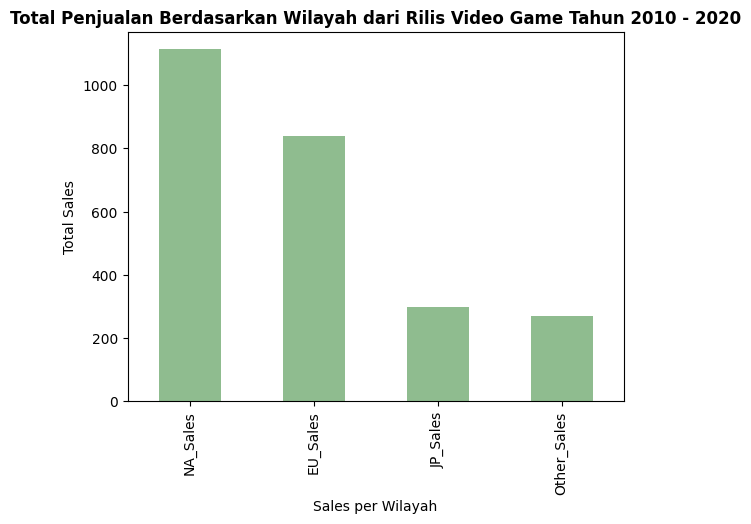

In [50]:
# Menampilkan grafik total_sales_wilayah
total_sales_wilayah = vidgame_clean[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
total_sales_wilayah.plot(kind = 'bar', color = 'darkseagreen')
plt.title('Total Penjualan Berdasarkan Wilayah dari Rilis Video Game Tahun 2010 - 2020', weight = 'bold')
plt.xlabel('Sales per Wilayah')
plt.ylabel('Total Sales')
plt.show()

Insight :

- Diketahui bahwa wilayah North Amerika memiliki nilai penjualan paling tinggi diantara wilayah lainnya

2. Bagaimana hasil penjualan video game berdasarkan platform yang digunakan ?

[Text(0.5, 1.0, 'Penjualan Video Games Berdasarkan Platform dari Tahun Rilis Video Games 2010 - 2020'),
 Text(0.5, 0, 'Game Console'),
 Text(0, 0.5, 'Total Penjualan')]

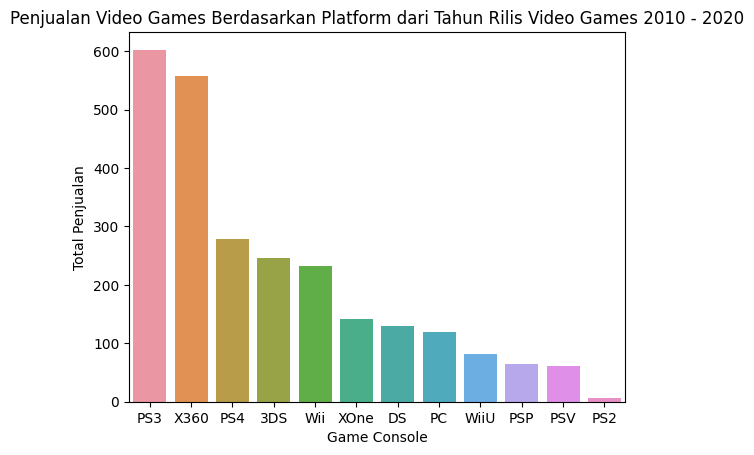

In [51]:
# Menampilkan grafik total_sales_platform
total_sales_platform = vidgame_clean[['Platform', 'Global_Sales']].groupby('Platform').sum().sort_values(by = 'Global_Sales', ascending = False)
ax = sns.barplot(data = total_sales_platform, x = total_sales_platform.index, y = 'Global_Sales')
ax.set(title = 'Penjualan Video Games Berdasarkan Platform dari Tahun Rilis Video Games 2010 - 2020', xlabel = 'Game Console', ylabel = 'Total Penjualan')

Insight :

- Diketahui bahwa video game yang paling banyak dibeli yaitu video game yang menggunakan platform PS3

3.   Apakah Genre yang paling favorit ?

[Text(0.5, 1.0, 'Video Games Favorite Berdasarkan Tahun Rilis dari 2010-2020'),
 Text(0, 0.5, 'Genre Video Games'),
 Text(0.5, 0, 'Jumlah Video Games')]

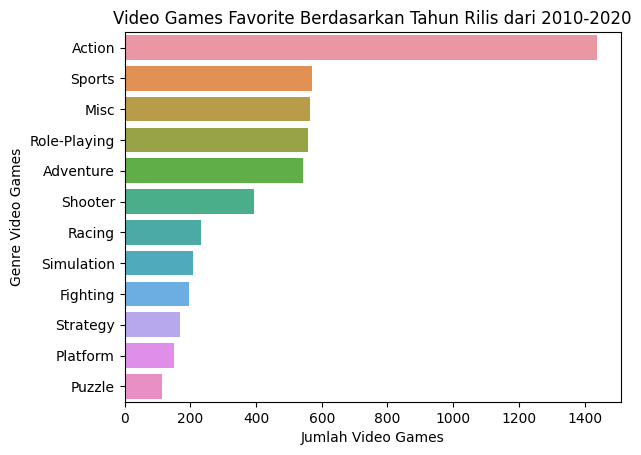

In [52]:
# Menampilkan grafik genre_favorite
genre_favorite = vidgame_clean['Genre'].value_counts().to_frame()
ax_genre = sns.barplot(data = genre_favorite, y = genre_favorite.index, x = 'Genre')
ax_genre.set(title = 'Video Games Favorite Berdasarkan Tahun Rilis dari 2010-2020', ylabel = 'Genre Video Games', xlabel = 'Jumlah Video Games')

Insight :

- Diketahui bahwa genre video game paling favorit yaitu video game bergenre action

4. Game apa yang penjualannya paling tinggi di seluruh dunia ?

[Text(0.5, 1.0, 'Game Terlaris Berdasarkan Tahun Rilis 2010 - 2020'),
 Text(0.5, 0, 'Game'),
 Text(0, 0.5, 'Total Penjualan')]

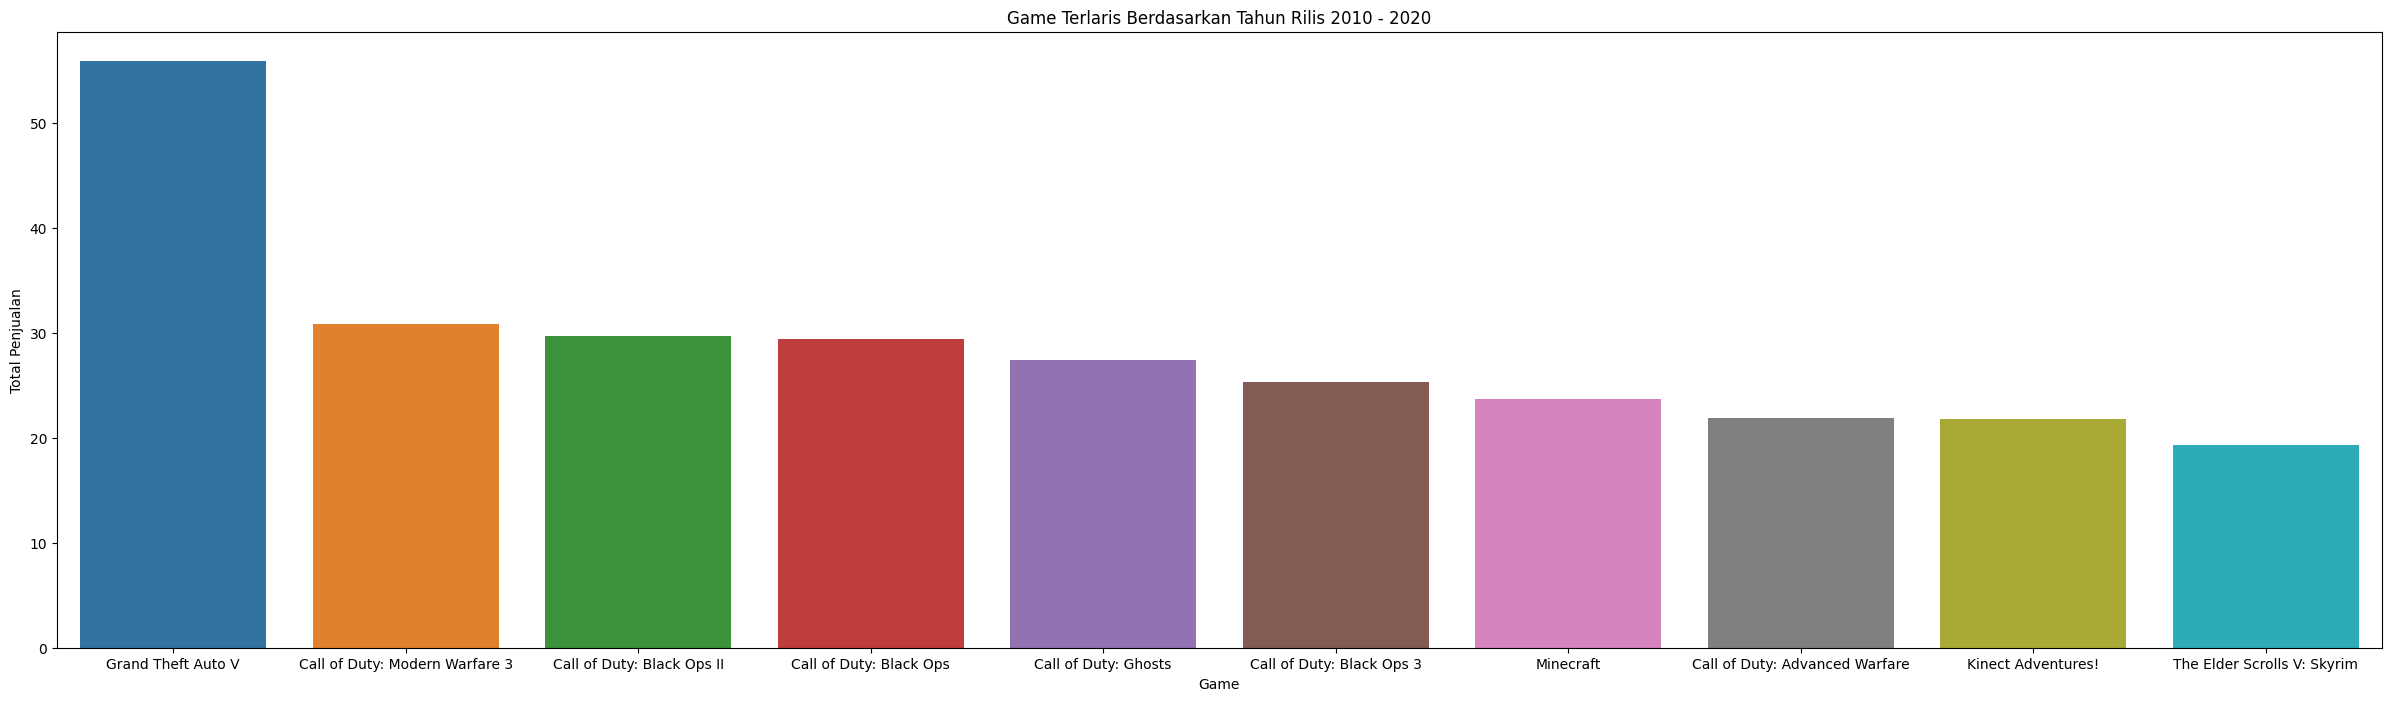

In [53]:
# Menampilkan grafik game terlaris
game_terlaris = vidgame_clean[['Name', 'Global_Sales']].groupby('Name').sum('Global_Sales').sort_values(by = 'Global_Sales', ascending = False)
plt.figure(figsize=(30,8))
ax_game = sns.barplot(data = game_terlaris.head(10), x = game_terlaris.head(10).index, y = 'Global_Sales')
ax_game.set(title = 'Game Terlaris Berdasarkan Tahun Rilis 2010 - 2020', xlabel = 'Game', ylabel = 'Total Penjualan')

Insight :

- Diketahui bahwa game yang paling laris yaitu game Grand Theft Auto V

5.   Kapan penjualan video game tertinggi berdasarkan platform yang digunakan ?

[Text(0.5, 1.0, 'Penjualan Tertinggi Video Game Berdasarkan Tahun Rilis 2010 - 2020'),
 Text(0.5, 0, 'Tahun'),
 Text(0, 0.5, 'Total Penjualan')]

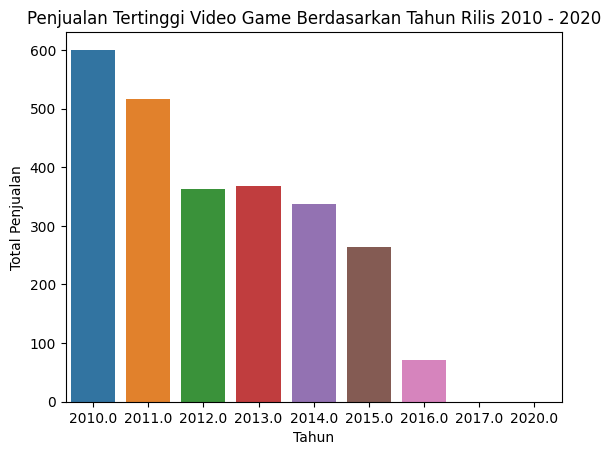

In [64]:
# Menampilkan grafik sales_year
sales_year = vidgame_clean[['Year', 'Global_Sales']].groupby(['Year']).sum('Global_Sales').sort_values(by = 'Global_Sales', ascending = False)
ax_year = sns.barplot(data = sales_year, x = sales_year.index, y = 'Global_Sales')
ax_year.set(title = 'Penjualan Tertinggi Video Game Berdasarkan Tahun Rilis 2010 - 2020', xlabel = 'Tahun', ylabel = 'Total Penjualan')

Insight :

- Diketahui bahwa video game yang paling banyak di beli yaitu video game dengan tahun rilis 2010

## **VI. Kesimpulan**

Dapat diketahui bahwa penjualan video game berdasarkan tahun rilis 2010 - 2020 :

- Penjualan video game tertinggi berada di wilayah North Amerika
- Video game dengan platform PS3 paling banyak terjual
- Genre paling favorit yaitu video game bergenre Action
- Game dengan penjualan tertinggi yaitu Grand Theft Auto V
- Video game dengan tahun rilis 2010 menjadi video game yang paling banyak terjual

Selain itu,

- Distribusi penyebaran data penjualan yakni distribusi tidak normal dengan jenis skewness kiri (left skewness)
- Rata-rata penjualan video game bergenre platform dan racing berbeda